# $D^0 \to K^0_Sπ^+π^-$ with TFA2 (Belle model)

We will fit 

$$
D^0 \to K^0_S \pi^+\pi^-
$$

decays generated with the Belle resonance model:

| Resonance | Amplitude | Phase (deg) | Fit fraction | ID |
|-----------|-----------|-------------|--------------|----|
| $K^*(892)^-$ | 1.590 ± 0.003 | 131.8 ± 0.2 | 0.6045 | 2 |
| $K_0^*(1430)^-$ | 2.059 ± 0.010 | −194.6 ± 1.7 | 0.0702 | 3 |
| $K_2^*(1430)^-$ | 1.150 ± 0.009 | −41.5 ± 0.4 | 0.0221 | 4 |
| $K^*(1410)^-$ | 0.496 ± 0.011 | 83.4 ± 0.9 | 0.0026 | 5 |
| $K^*(1680)^-$ | 1.556 ± 0.097 | −83.2 ± 1.2 | 0.0016 | 6 |
| $K^*(892)^+$ | 0.139 ± 0.002 | −42.1 ± 0.7 | 0.0046 | 7 |
| $K_0^*(1430)^+$ | 0.176 ± 0.007 | −102.3 ± 2.1 | 0.0005 | 8 |
| $K_2^*(1430)^+$ | 0.077 ± 0.007 | −32.2 ± 4.7 | 0.0001 | 9 |
| $K^*(1410)^+$ | 0.248 ± 0.010 | −145.7 ± 2.9 | 0.0007 | 10 |
| $K^*(1680)^+$ | 1.407 ± 0.053 | 86.1 ± 2.7 | 0.0013 | 11 |
| $\rho(770)$ | 1.0 (fixed) | 0.0 (fixed) | 0.2000 | 1 |
| $\omega(782)$ | 0.0370 ± 0.0004 | 114.9 ± 0.6 | 0.0057 | 12 |
| $f_2(1270)$ | 1.300 ± 0.013 | −31.6 ± 0.5 | 0.0141 | 13 |
| $\rho(1450)$ | 0.532 ± 0.027 | 80.8 ± 2.1 | 0.0012 | 14 |
| ππ S wave | - | - | 0.1288 | 15 |

The $\pi\pi$ S-wave is parameterized with the following parameters:

| Parameter | Amplitude | Phase (deg) |
|-----------|-----------|-------------|
| $\beta_1$ | 4.23 ± 0.02 | 164.0 ± 0.2 |
| $\beta_2$ | 10.90 ± 0.02 | 15.6 ± 0.2 |
| $\beta_3$ | 37.4 ± 0.3 | 3.3 ± 0.4 |
| $\beta_4$ | 14.7 ± 0.1 | −8.9 ± 0.3 |
| $f^{prod}_{11}$ | 12.76 ± 0.05 | −161.1 ± 0.3 |
| $f^{prod}_{12}$ | 14.2 ± 0.2 | −176.2 ± 0.6 |
| $f^{prod}_{13}$ | 10.0 ± 0.5 | −124.7 ± 2.1 |

The $K\pi$ S-wave is parametrized with the following parameters:

| Parameter | Value |
|-----------|-------|
| M ($MeV/c^2$) | 1461.7 ± 0.8 |
| Γ ($MeV/c^2$) | 268.3 ± 1.1 |
| F | 0.4524 ± 0.005 |
| $\phi_F$ (rad) | 0.248 ± 0.003 |
| R | 1.0 (fixed) |
| $\phi_R$ (rad) | 2.495 ± 0.009 |
| $a$ ($GeV/c^2$) | 0.172 ± 0.006 |
| $r$ ($GeV/c^2$) | −20.6 ± 0.3 |

The $K^*(892)$ is parametrized with the following parameters:

| Parameter | Value |
|-----------|-------|
| M ($MeV/c^2$) | 892.68 ± 0.04 |
| Γ ($MeV/c^2$) | 47.49 ± 0.06 |

## Paper description of the model

The Dalitz amplitudes $\mathcal{A}_f$ and $\bar{\mathcal{A}}_f$ are expressed as a sum of quasi-two-body amplitudes. For the P- and D-wave decays, we include 12 intermediate resonances described by relativistic Breit-Wigner parametrizations with massdependent widths, Blatt-Weisskopf penetration factors as form factors, and Zemach tensors for the angular dependence [19]. For the ππ S-wave dynamics, we adopt the K-matrix formalism with P-vector approximation [20].For the K0Sπ S wave, we follow the same description as in Ref. [14]

Import modules

In [1]:
# Import AmpliTF modules
import amplitf.interface as atfi
import amplitf.kinematics as atfk
import amplitf.dynamics as atfd
import amplitf.likelihood as atfl
from amplitf.phasespace.dalitz_phasespace import DalitzPhaseSpace

# Import TFA modules
import tfa.toymc as tft
import tfa.plotting as tfp
import tfa.optimisation as tfo

2025-02-10 15:35:46.492137: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


Set the number of events to generate and the number of normalisation point to calculate the integral of the likelihood

In [2]:
ntoys = 10000  # Number of points to generate
nnorm = 100000  # Number of normalisation points

Now define some constants

In [3]:
# Masses of final state particles
from particle.particle import literals as lp
# Dalitz Particles
mkz = atfi.const(lp.K_S_0.mass/1000)
mpi = atfi.const(lp.pi_plus.mass/1000)
md = atfi.const(lp.D_0.mass/1000)

# Resonances
mkst = atfi.const(lp.Kst_892_0.mass/1000)
wkst = atfi.const(lp.Kst_892_0.width/1000)
mrho = atfi.const(lp.rho_770_0.mass/1000)
wrho = atfi.const(lp.rho_770_0.width/1000)
mk0st1430 = atfi.const(lp.K_0st_1430_plus.mass/1000)
wk0st1430 = atfi.const(lp.K_0st_1430_plus.width/1000)
mk2st1430 = atfi.const(lp.K_2st_1430_plus.mass/1000)
wk2st1430 = atfi.const(lp.K_2st_1430_plus.width/1000)
mkst1410 = atfi.const(lp.Kst_1410_plus.mass/1000)
wkst1410 = atfi.const(lp.Kst_1410_plus.width/1000)
mkst1680 = atfi.const(lp.Kst_1680_plus.mass/1000)
wkst1680 = atfi.const(lp.Kst_1680_plus.width/1000)
momega = atfi.const(lp.omega_782.mass/1000)
womega = atfi.const(lp.omega_782.width/1000)
mf2_1270 = atfi.const(lp.f_2_1270.mass/1000)
wf2_1270 = atfi.const(lp.f_2_1270.width/1000)
mrho1450 = atfi.const(lp.rho_1450_0.mass/1000)
wrho1450 = atfi.const(lp.rho_1450_0.width/1000)

# Blatt-Weisskopf radii for Breit-Wigner lineshape
rd = atfi.const(5.0)
rr = atfi.const(1.5)

and a class to deal with three-body Dalitz phase-space

In [4]:
phsp = DalitzPhaseSpace(mpi, mkz, mpi, md)

## Model
Below there is a function to define the model, allowing to switch on and off specific components.

In [5]:
def model(x):

    m2ab = phsp.m2ab(x)
    m2bc = phsp.m2bc(x)
    m2ac = phsp.m2ac(x)

    # zemach tensors
    # zem_s0 = atfk.zemach_tensor(m2ab, m2ac, m2bc, md, mpi, mkz, mpi, 0)
    # zem_s1 = atfk.zemach_tensor(m2ab, m2ac, m2bc, md, mpi, mkz, mpi, 1)
    # zem_s2 = atfk.zemach_tensor(m2ab, m2ac, m2bc, md, mpi, mkz, mpi, 2)

    coshel_ab = phsp.cos_helicity_ab(x)
    coshel_bc = phsp.cos_helicity_bc(x)
    coshel_ac = phsp.cos_helicity_ac(x)

    hel_ab_0 = atfd.helicity_amplitude(coshel_ab, 0)
    hel_bc_0 = atfd.helicity_amplitude(coshel_bc, 0)
    hel_ac_0 = atfd.helicity_amplitude(coshel_ac, 0)
    hel_ab_1 = atfd.helicity_amplitude(coshel_ab, 1)
    hel_bc_1 = atfd.helicity_amplitude(coshel_bc, 1)
    hel_ac_1 = atfd.helicity_amplitude(coshel_ac, 1)
    hel_ab_2 = atfd.helicity_amplitude(coshel_ab, 2)
    hel_bc_2 = atfd.helicity_amplitude(coshel_bc, 2)
    hel_ac_2 = atfd.helicity_amplitude(coshel_ac, 2)

    bw1 = atfd.breit_wigner_lineshape(m2ac, mrho, wrho, mpi, mpi, mkz, md, rd, rr, 1, 1)
    bw2 = atfd.breit_wigner_lineshape(m2ab, mkst, wkst, mpi, mkz, mpi, md, rd, rr, 1, 1)
    bw3 = atfd.breit_wigner_lineshape(m2ab, mk0st1430, wk0st1430, mpi, mkz, mpi, md, rd, rr, 1, 1)
    bw4 = atfd.breit_wigner_lineshape(m2ab, mk2st1430, wk2st1430, mpi, mkz, mpi, md, rd, rr, 1, 1)
    bw5 = atfd.breit_wigner_lineshape(m2ab, mkst1410, wkst1410, mpi, mkz, mpi, md, rd, rr, 1, 1)
    bw6 = atfd.breit_wigner_lineshape(m2ab, mkst1680, wkst1680, mpi, mkz, mpi, md, rd, rr, 1, 1)
    bw7 = atfd.breit_wigner_lineshape(m2bc, mkst, wkst, mpi, mkz, mpi, md, rd, rr, 1, 1)
    bw8 = atfd.breit_wigner_lineshape(m2bc, mk0st1430, wk0st1430, mpi, mkz, mpi, md, rd, rr, 1, 1)
    bw9 = atfd.breit_wigner_lineshape(m2bc, mk2st1430, wk2st1430, mpi, mkz, mpi, md, rd, rr, 1, 1)
    bw10 = atfd.breit_wigner_lineshape(m2bc, mkst1410, wkst1410, mpi, mkz, mpi, md, rd, rr, 1, 1)
    bw11 = atfd.breit_wigner_lineshape(m2bc, mkst1680, wkst1680, mpi, mkz, mpi, md, rd, rr, 1, 1)
    bw12 = atfd.breit_wigner_lineshape(m2ac, momega, womega, mpi, mpi, mkz, md, rd, rr, 1, 1)
    bw13 = atfd.breit_wigner_lineshape(m2ac, mf2_1270, wf2_1270, mpi, mpi, mkz, md, rd, rr, 1, 1)
    bw14 = atfd.breit_wigner_lineshape(m2ac, mrho1450, wrho1450, mpi, mpi, mkz, md, rd, rr, 1, 1)

    def _model(a1r, a1i, a2r, a2i, a3r, a3i, 
               a4r, a4i, a5r, a5i, a6r, a6i,
               a7r, a7i, a8r, a8i, a9r, a9i, 
               a10r, a10i, a11r, a11i, a12r, a12i, 
               a13r, a13i, a14r, a14i, switches=15 * [1]):

        a1 = atfi.complex(a1r, a1i)
        a2 = atfi.complex(a2r, a2i)
        a3 = atfi.complex(a3r, a3i)
        a4 = atfi.complex(a4r, a4i)
        a5 = atfi.complex(a5r, a5i)
        a6 = atfi.complex(a6r, a6i)
        a7 = atfi.complex(a7r, a7i)
        a8 = atfi.complex(a8r, a8i)
        a9 = atfi.complex(a9r, a9i)
        a10 = atfi.complex(a10r, a10i)
        a11 = atfi.complex(a11r, a11i)
        a12 = atfi.complex(a12r, a12i)
        a13 = atfi.complex(a13r, a13i)
        a14 = atfi.complex(a14r, a14i)

        ampl = atfi.cast_complex(atfi.ones(m2ab)) * atfi.complex(
            atfi.const(0.0), atfi.const(0.0)
        )

        if switches[0]:
            ampl += a1 * bw1 * hel_ac_1
        if switches[1]:
            ampl += a2 * bw2 * hel_ab_1
        if switches[2]:
            ampl += a3 * bw3 * hel_ab_0
        if switches[3]:
            ampl += a4 * bw4 * hel_ab_2
        if switches[4]:
            ampl += a5 * bw5 * hel_ab_1
        if switches[5]:
            ampl += a6 * bw6 * hel_ab_1
        if switches[6]:
            ampl += a7 * bw7 * hel_bc_1
        if switches[7]:
            ampl += a8 * bw8 * hel_bc_0
        if switches[8]:
            ampl += a9 * bw9 * hel_bc_2
        if switches[9]:
            ampl += a10 * bw10 * hel_bc_1
        if switches[10]:
            ampl += a11 * bw11 * hel_bc_1
        if switches[11]:
            ampl += a12 * bw12 * hel_ac_1
        if switches[12]:
            ampl += a13 * bw13 * hel_ac_2
        if switches[13]:
            ampl += a14 * bw14 * hel_ac_1
        if switches[14]:
            ampl += atfi.cast_complex(atfi.ones(m2ab)) * atfi.complex(
                atfi.const(5.0), atfi.const(0.0)
            )

        return atfd.density(ampl)

    return _model

## Toy MC Model
The model of the toy MC has all the components on by default. By means of the `switches` flag, some of them can be turned off to see the effects on the fit.

In [6]:
import numpy as np

In [7]:
def toymc_model(x, switches=[1,1,1,1,1,1,1,1,1,1,1,1,1,0,1]):#15 * [1]):
    return model(x)(
        switches=switches,
        a1r=atfi.const(1.0),
        a1i=atfi.const(0.0),
        a2r=atfi.const(1.590*np.cos(131.8/180*np.pi)),
        a2i=atfi.const(1.590*np.sin(131.8/180*np.pi)),
        a3r=atfi.const(2.059*np.cos(-194.6/180*np.pi)),
        a3i=atfi.const(2.059*np.sin(-194.6/180*np.pi)),
        a4r=atfi.const(1.150*np.cos(-41.5/180*np.pi)),
        a4i=atfi.const(1.150*np.sin(-41.5/180*np.pi)),
        a5r=atfi.const(0.496*np.cos(83.4/180*np.pi)),
        a5i=atfi.const(0.496*np.sin(83.4/180*np.pi)),
        a6r=atfi.const(1.556*np.cos(-83.2/180*np.pi)),
        a6i=atfi.const(1.556*np.sin(-83.2/180*np.pi)),
        a7r=atfi.const(0.139*np.cos(-42.1/180*np.pi)),
        a7i=atfi.const(0.139*np.sin(-42.1/180*np.pi)),
        a8r=atfi.const(0.176*np.cos(-102.3/180*np.pi)),
        a8i=atfi.const(0.176*np.sin(-102.3/180*np.pi)),
        a9r=atfi.const(0.077*np.cos(-32.2/180*np.pi)),
        a9i=atfi.const(0.077*np.sin(-32.2/180*np.pi)),
        a10r=atfi.const(0.248*np.cos(-145.7/180*np.pi)),
        a10i=atfi.const(0.248*np.sin(-145.7/180*np.pi)),
        a11r=atfi.const(1.407*np.cos(86.1/180*np.pi)),
        a11i=atfi.const(1.407*np.sin(86.1/180*np.pi)),
        a12r=atfi.const(0.0370*np.cos(114.9/180*np.pi)),
        a12i=atfi.const(0.0370*np.sin(114.9/180*np.pi)),
        a13r=atfi.const(1.300*np.cos(-31.6/180*np.pi)),
        a13i=atfi.const(1.300*np.sin(-31.6/180*np.pi)),
        a14r=atfi.const(0.532*np.cos(80.8/180*np.pi)),
        a14i=atfi.const(0.532*np.sin(80.8/180*np.pi)),
    )

## Likelihood

The Negative Log Likelihood

In [19]:
# TF graph for unbinned negalite log likelihood (the quantity to be minimised)
def nll(data, norm):
    data_model = model(data)
    norm_model = model(norm)

    @atfi.function
    def _nll(pars):
        return atfl.unbinned_nll(data_model(**pars), atfl.integral(norm_model(**pars)))

    return _nll

## Samples

The samples to fit

In [10]:
toy_sample = tft.run_toymc(
    toymc_model, phsp, 10, maximum=1.0e-20, chunk=1000000, components=False
)

print(toy_sample)

  Updating maximum: 1e-20 -> 2974.348621366208. Starting over.
  Chunk 1, size=25138, total length=25138
tf.Tensor(
[[1.81236569 0.55054537]
 [2.57213033 0.55035965]
 [2.39705398 0.49547594]
 [2.28832052 1.29783038]
 [1.08797077 2.16294184]
 [1.74278436 0.75046114]
 [1.85553114 0.51292982]
 [0.97089849 1.56604311]
 [2.52515461 0.52172692]
 [0.44871638 2.32569997]], shape=(10, 2), dtype=float64)


and to calculate the integrals

In [11]:
norm_sample = phsp.uniform_sample(nnorm)

print(norm_sample)

tf.Tensor(
[[0.9456169  2.35131714]
 [1.82368572 1.69016045]
 [1.7733293  1.27637431]
 ...
 [0.77191296 2.71767905]
 [1.3460166  1.67002597]
 [0.82485581 1.18046511]], shape=(47067, 2), dtype=float64)


Beware that only approximately 1/2 of the events have been generated in the normalisation sample.

## Fit

We are now ready to run the fit. We define first the fit parameters:

In [23]:
pars = []
for i in range(14):
    if not i:
        pars += [tfo.FitParameter(f"a{i+1}r", 1.0, -10.0, 10.0)]
        pars += [tfo.FitParameter(f"a{i+1}i", 0.0, -10.0, 10.0)]
    else:
        pars += [tfo.FitParameter(f"a{i+1}r", 0.0, -10.0, 10.0)]
        pars += [tfo.FitParameter(f"a{i+1}i", 0.0, -10.0, 10.0)]

# pars = [
#     tfo.FitParameter("a1r", 1.0, -10.0, 10.0),
#     tfo.FitParameter("a1i", 0.0, -10.0, 10.0),
#     tfo.FitParameter("a2r", 0.5, -10.0, 10.0),
#     tfo.FitParameter("a2i", 0.0, -10.0, 10.0),
#     tfo.FitParameter("a3r", 2.0, -10.0, 10.0),
#     tfo.FitParameter("a3i", 0.0, -10.0, 10.0),
#     tfo.FitParameter("a4r", 2.0, -10.0, 10.0),
#     tfo.FitParameter("a4i", 0.0, -10.0, 10.0),
#     tfo.FitParameter("a5r", 2.0, -10.0, 10.0),
#     tfo.FitParameter("a5i", 0.0, -10.0, 10.0),
#     tfo.FitParameter("a6r", 2.0, -10.0, 10.0),
#     tfo.FitParameter("a6i", 0.0, -10.0, 10.0),
#     tfo.FitParameter("a7r", 2.0, -10.0, 10.0),
#     tfo.FitParameter("a7i", 0.0, -10.0, 10.0),
#     tfo.FitParameter("a8r", 2.0, -10.0, 10.0),
#     tfo.FitParameter("a8i", 0.0, -10.0, 10.0),
#     tfo.FitParameter("a9r", 2.0, -10.0, 10.0),
#     tfo.FitParameter("a9i", 0.0, -10.0, 10.0),
#     tfo.FitParameter("a10r", 2.0, -10.0, 10.0),
#     tfo.FitParameter("a10i", 0.0, -10.0, 10.0),
#     tfo.FitParameter("a11r", 2.0, -10.0, 10.0),
#     tfo.FitParameter("a11i", 0.0, -10.0, 10.0),
#     tfo.FitParameter("a12r", 2.0, -10.0, 10.0),
#     tfo.FitParameter("a12i", 0.0, -10.0, 10.0),
#     tfo.FitParameter("a13r", 0.0, -10.0, 10.0),
#     tfo.FitParameter("a13i", 0.0, -10.0, 10.0),
#     tfo.FitParameter("a14r", 2.0, -10.0, 10.0),
#     tfo.FitParameter("a14i", 0.0, -10.0, 10.0),
# ]

In [17]:
# for p in pars:
#     if p.name in ["a13r", "a13i"]:
#         p.fix()
print(len(pars))

30


and run Minuit

In [22]:
# Run MINUIT minimisation of the neg. log likelihood
result = tfo.run_minuit(nll(toy_sample, norm_sample), pars)
print(result)
cov = result['covariance']

print(f"{result['time']/result['func_calls']} sec per function call")

fitted_pars = {p: atfi.const(v[0]) for p, v in result["params"].items()}

10 nan [ 1. nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
20 nan [ 1.  0. nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
30 nan [ 1.  0.  0.  0. nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
40 nan [ 1.  0.  0.  0.  0.  0. nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
50 nan [ 1.  0.  0.  0.  0.  0.  0. nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
60 nan [ 1.  0.  0.  0.  0.  0.  0.  0.  0. nan  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
70 nan [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. nan  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
80 nan [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. nan  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
90 nan [ 1.  0.  0.  0. 

Define a function with the fitted model to calculate fit fractions and projections

In [52]:
def fitted_model(x, switches=13 * [1]+[0,1]):
    return model(x)(**fitted_pars, switches=switches)

The fit fractions are calculated

In [53]:
ff = tfo.calculate_fit_fractions(fitted_model, norm_sample)
print(ff)

[0.008758343653339317, 0.004836576005479796, 0.017984811808175728, 0.010120359749542864, 0.007181237862417766, 0.06584743144481404, 0.07698444065098729, 0.018031963882273027, 0.010114177329780795, 0.007201555917379999, 0.06594548401487206, 0.6935112734169906, 0.0, nan, 0.03876613267410156]


## Plotting

For plotting the results we generate a sample according to the model and we overlay it to the data

In [54]:
fitted_sample = tft.run_toymc(
    fitted_model, phsp, nnorm, maximum=1.0e-20, chunk=1000000, components=True
)

  Updating maximum: 1e-20 -> 126729.78759935724. Starting over.
  Chunk 1, size=2476, total length=2476
  Chunk 2, size=2536, total length=5012
  Chunk 3, size=2450, total length=7462
  Chunk 4, size=2419, total length=9881
  Chunk 5, size=2455, total length=12336
  Chunk 6, size=2461, total length=14797
  Chunk 7, size=2364, total length=17161
  Chunk 8, size=2342, total length=19503
  Chunk 9, size=2375, total length=21878
  Chunk 10, size=2482, total length=24360
  Chunk 11, size=2393, total length=26753
  Chunk 12, size=2480, total length=29233
  Chunk 13, size=2490, total length=31723
  Chunk 14, size=2335, total length=34058
  Chunk 15, size=2488, total length=36546
  Chunk 16, size=2380, total length=38926
  Chunk 17, size=2419, total length=41345
  Chunk 18, size=2562, total length=43907
  Chunk 19, size=2400, total length=46307
  Chunk 20, size=2479, total length=48786
  Chunk 21, size=2432, total length=51218
  Chunk 22, size=2472, total length=53690
  Chunk 23, size=2404, to

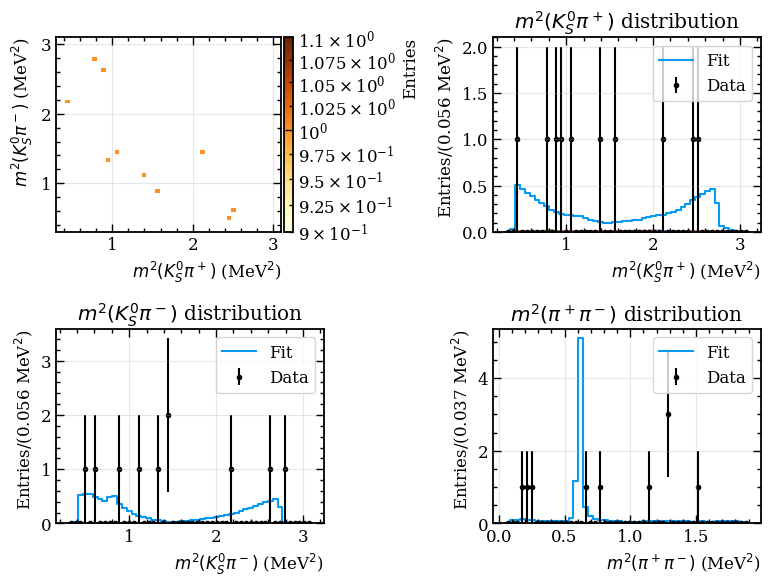

In [55]:
# Plot results
import matplotlib.pyplot as plt

tfp.set_lhcb_style(size=12, usetex=False)  # Adjust plotting style for LHCb papers
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))  # Single subplot on the figure

# Plot 1D histogram from the toy MC sample
tfp.plot_distr2d(
    toy_sample[:, 0],
    toy_sample[:, 1],
    bins=(50, 50),
    ranges=((0.3, 3.1), (0.3, 3.1)),
    fig=fig,
    ax=ax[0, 0],
    labels=(r"$m^2(K_S^0\pi^+)$", r"$m^2(K_S^0\pi^-)$"),
    units=("MeV$^2$", "MeV$^2$"),
    log=True,
)

tfp.plot_distr1d_comparison(
    toy_sample[:, 0],
    fitted_sample[:, 0],
    cweights=[fitted_sample[:, 2 + i] for i in range(4)],
    bins=50,
    range=(0.3, 3.1),
    ax=ax[0, 1],
    label=r"$m^2(K_S^0\pi^+)$",
    units="MeV$^2$",
)

tfp.plot_distr1d_comparison(
    toy_sample[:, 1],
    fitted_sample[:, 1],
    cweights=[fitted_sample[:, 2 + i] for i in range(4)],
    bins=50,
    range=(0.3, 3.1),
    ax=ax[1, 0],
    label=r"$m^2(K_S^0\pi^-)$",
    units="MeV$^2$",
)

tfp.plot_distr1d_comparison(
    phsp.m2ac(toy_sample),
    phsp.m2ac(fitted_sample),
    cweights=[fitted_sample[:, 2 + i] for i in range(4)],
    bins=50,
    range=(0.05, 1.9),
    ax=ax[1, 1],
    label=r"$m^2(\pi^+\pi^-)$",
    units="MeV$^2$",
)

# Show the plot
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

In [16]:
samp = phsp.filter(phsp.unfiltered_sample(1000))

In [17]:
model(samp)

<function __main__.model.<locals>._model(a1r, a1i, a2r, a2i, a3r, a3i, switches=[1, 1, 1, 1])>